In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('Modeling_set.csv', index_col = 0)

In [3]:
pd.set_option('display.max_columns', 999)
df.head()

,ASECWT,RELATE,AGE,SEX,RACE,MARST,POPSTAT,VETSTAT,FAMREL,BPL,YRIMMIG,OCC2010,IND1990,CLASSWKR,UHRSWORK1,EDUC,EDUC99,DIFFANY,INCTOT,AGE_NEW,EDUCATION,WORK_HRS
1,824.29,head,48,0,white,1,adult-civilian,no-service,reference-person,usa,0,OFFICE AND ADMINISTRATIVE SUPPORT,"TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBL...",Governemnt,39,"Associate's degree, occupational/vocational pr...",13,1,0,2,1,1
2,824.29,spouse,55,1,white,1,adult-civilian,no-service,spouse,usa,0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",PROFESSIONAL AND RELATED SERVICES,Private,40,Master's degree,16,1,1,2,2,1
6,853.00,head,52,0,white,1,adult-civilian,no-service,reference-person,north-america,1,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS","AGRICULTURE, FORESTRY, AND FISHERIES",Self-Employed,39,Grades 7 or 8,5,1,1,2,0,1
7,853.00,spouse,55,1,white,1,adult-civilian,no-service,spouse,usa,0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS","AGRICULTURE, FORESTRY, AND FISHERIES",Self-Employed,39,Grades 7 or 8,5,1,0,2,0,1
8,947.30,child,22,0,white,0,adult-civilian,no-service,child,usa,0,CONSTRUCTION,CONSTRUCTION,Private,50,Grades 7 or 8,5,1,0,0,0,1


In [4]:
df['IND1990'].nunique()

13

In [5]:
#df = pd.get_dummies(df, columns = ['RELATE', 'RACE', 'MARST', 'POPSTAT', 'VETSTAT',
                                   #'BPL', 'IND1990', 'OCC2010', 'CLASSWKR', 'EDUCATION',
                                   #'DIFFANY', 'AGE_NEW', 'WORK_HRS'],drop_first=True)

In [6]:
#### TEST ####
df = pd.get_dummies(df, columns = ['RELATE', 'RACE', 'POPSTAT', 'VETSTAT',
                                   'BPL', 'IND1990', 'OCC2010', 'CLASSWKR', 'EDUCATION',
                                   'DIFFANY', 'FAMREL'],drop_first=True)

In [7]:
df.shape

(65739, 83)

# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
#X_train.drop(columns=to_drop, inplace=True)
#X_test.drop(columns=to_drop, inplace=True)



to_drop

# Modeling

In [8]:
predictors = df.drop(columns = ['INCTOT', 'AGE_NEW', 'EDUC99', 'WORK_HRS', 'EDUC'])
target = df['INCTOT']

In [9]:
predictors.head()

,ASECWT,AGE,SEX,MARST,YRIMMIG,UHRSWORK1,RELATE_grandchild,RELATE_head,RELATE_other nonrelative,RELATE_other relative,RELATE_parent,RELATE_roommate,RELATE_sibling,RELATE_spouse,RELATE_unmarried partner,RACE_asian,RACE_eskimo,RACE_hawaiian,RACE_mixed,RACE_white,VETSTAT_yes,BPL_asia,BPL_australia-new-zealand,BPL_europe,BPL_north-america,BPL_south-america,BPL_usa,IND1990_BUSINESS AND REPAIR SERVICES,IND1990_CONSTRUCTION,IND1990_ENTERTAINMENT AND RECREATION SERVICES,"IND1990_FINANCE, INSURANCE, AND REAL ESTATE",IND1990_MANUFACTURING,IND1990_MINING,IND1990_PERSONAL SERVICES,IND1990_PROFESSIONAL AND RELATED SERVICES,IND1990_PUBLIC ADMINISTRATION,IND1990_RETAIL TRADE,"IND1990_TRANSPORTATION, COMMUNICATIONS, AND OTHER PUBLIC UTILITIES",IND1990_WHOLESALE TRADE,"OCC2010_ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA",OCC2010_BUILDING AND GROUNDS CLEANING AND MAINTENANCE,OCC2010_BUSINESS OPERATIONS SPECIALISTS,OCC2010_COMMUNITY AND SOCIAL SERVICES2000,OCC2010_COMMUNITY AND SOCIAL SERVICES2010,OCC2010_COMMUNITY AND SOCIAL SERVICES2020,OCC2010_COMMUNITY AND SOCIAL SERVICES2040,OCC2010_COMMUNITY AND SOCIAL SERVICES2050,OCC2010_COMPUTER AND MATHEMATICAL,OCC2010_CONSTRUCTION,"OCC2010_EDUCATION, TRAINING, AND LIBRARY",OCC2010_EXTRACTION,"OCC2010_FARMING, FISHING, AND FORESTRY",OCC2010_FINANCIAL SPECIALISTS,OCC2010_FOOD PREPARATION AND SERVING,OCC2010_HEALTHCARE PRACTITIONERS AND TECHNICAL,OCC2010_HEALTHCARE SUPPORT,"OCC2010_INSTALLATION, MAINTENANCE, AND REPAIR",OCC2010_LEGAL,"OCC2010_LIFE, PHYSICAL, AND SOCIAL SCIENCE","OCC2010_MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",OCC2010_OFFICE AND ADMINISTRATIVE SUPPORT,OCC2010_PERSONAL CARE AND SERVICE,OCC2010_PRODUCTION,OCC2010_PROTECTIVE SERVICE,OCC2010_SALES AND RELATED,OCC2010_TECHNICIANS,OCC2010_TRANSPORTATION AND MATERIAL MOVING,CLASSWKR_Private,CLASSWKR_Self-Employed,CLASSWKR_Unpaid family worker,EDUCATION_1,EDUCATION_2,EDUCATION_3,DIFFANY_2,FAMREL_not-family-member,FAMREL_other-relative,FAMREL_reference-person,FAMREL_spouse
1,824.29,48,0,1,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,824.29,55,1,1,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
6,853.00,52,0,1,1,39,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,853.00,55,1,1,0,39,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,947.30,22,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [10]:
#TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=333)

In [11]:
#SCALE DATA
scaler = StandardScaler()  

scaled = scaler.fit(X_train)

X_train = scaled.transform(X_train)  
X_test = scaled.transform(X_test) 

## Baseline Predictions

In [12]:
#GET BASE ACCURACY
base = max(df['INCTOT'].mean(), (1-df['INCTOT'].mean()))
base

0.7005734799738359

#### Logistic Regression

In [13]:
logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state = 333)

logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_log))


# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_log))

Test Accuracy score:  0.7610587161545482
Test F1 score:  0.6639281129653402


#### KNN

In [15]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_knn))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_knn))

Test Accuracy score:  0.7723151810161242
Test F1 score:  0.5957216940363007


#### Decision Tree

In [16]:
tree = DecisionTreeClassifier(random_state = 333,class_weight = 'balanced')

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_tree))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_tree))

Test Accuracy score:  0.7279586248859142
Test F1 score:  0.5518692993885937


#### Random Forest

In [17]:
rfc = RandomForestClassifier(random_state = 333, class_weight='balanced')

rfc.fit(X_train, y_train)

y_pred_forest = rfc.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_forest))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_forest))

Test Accuracy score:  0.7905080620626711
Test F1 score:  0.6121437422552665


### PLOT ROC CURVES/COMPUTE ROC_AUC SCORES

In [18]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_log_prob = logreg.predict_proba(X_test)[:,1]
y_knn_prob = knn.predict_proba(X_test)[:,1]
y_tree_prob = tree.predict_proba(X_test)[:,1]
y_rfc_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_log_prob)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn_prob)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_tree_prob)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_rfc_prob)

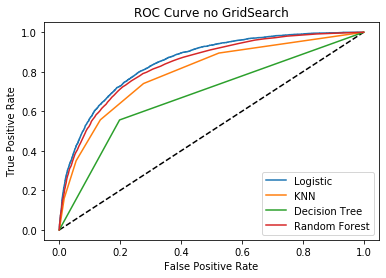

In [30]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log,label = 'Logistic')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_tree, tpr_tree,label = 'Decision Tree')
plt.plot(fpr_rfc, tpr_rfc,label = 'Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve no GridSearch')
plt.show()

In [20]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_log_prob)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_knn_prob)))
print("AUC Decision Tree: {}".format(roc_auc_score(y_test, y_tree_prob)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_rfc_prob)))



AUC Logistic: 0.8493832811198692
AUC KNN: 0.7924434226498409
AUC Decision Tree: 0.6791033912440059
AUC Random Forest: 0.8330266647718974


#### XGBOOST

In [21]:
# Import xgboost
import xgboost as xgb

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
y_pred_xgb = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_xgb))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_xgb))

Test Accuracy score:  0.7780346820809249
Test F1 score:  0.5333844973138909


In [22]:
y_xgb_prob = xg_cl.predict_proba(X_test)[:,1]

In [23]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_xgb_prob)

In [24]:
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_xgb_prob)))

AUC Random Forest: 0.817072833481346


In [25]:
param_grid_xgb = {
    "learning_rate": [.1,.2],
    'max_depth': [3,6],
    'min_child_weight': [1,2],
    'subsample': [.5,1],
    'n_estimators': [20,30],
}

grid_search_xgb = GridSearchCV(estimator = xg_cl, param_grid = param_grid_xgb,cv = 7,scoring = 'f1', n_jobs = 4)

In [26]:
grid_search_xgb.fit(X_train,y_train)
xgb_params = grid_search_xgb.best_params_
print(xgb_params)

KeyboardInterrupt: 

In [ ]:
xgb_grid = XGBClassifier(**xgb_params, random_state = 333,class_weight = 'balanced')
xgb_grid.fit(X_train, y_train)
y_pred_xgb_grid = xgb_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_xgb_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_xgb_grid))

## Grid Search

### LOGISTIC GRID

In [27]:
param_grid_log =  {'penalty' : ['l1', 'l2'],
                   'C' : np.logspace(-4, 4, 20)}
grid_search_log = GridSearchCV(estimator = logreg, param_grid = param_grid_log,cv = 7,scoring = 'f1', n_jobs = -1)

In [28]:
grid_search_log.fit(X_train,y_train)
log_params = grid_search_log.best_params_
print(log_params)

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'C': 0.08858667904100823, 'penalty': 'l2'}


In [29]:
logreg_grid = LogisticRegression(**log_params,solver='liblinear', class_weight='balanced', random_state = 333)

logreg_grid.fit(X_train, y_train)

y_pred_log_grid = logreg_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_log_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_log_grid))

Test Accuracy score:  0.7612412534225738
Test F1 score:  0.6641561109209175


### KNN GRID

In [40]:
param_grid_knn = {'n_neighbors' : [15,17,19],
                 'weights':['uniform','distance'],
                 'metric' : ['euclidean','manhattan']}
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn,cv = 5, scoring = 'f1',n_jobs = -1)

In [41]:
grid_search_knn.fit(X_train,y_train)
knn_params = grid_search_knn.best_params_
print(knn_params)

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


In [42]:
knn_grid = KNeighborsClassifier(**knn_params)
knn_grid.fit(X_train,y_train)
y_pred_knn_grid = knn_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_knn_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_knn_grid))

Test Accuracy score:  0.7859446303620322
Test F1 score:  0.6045413669064748


### DECISION TREE GRID

In [37]:
param_grid_tree = { 'criterion' : ['gini', 'entropy'],
                   'max_depth' : [9,12,14],
                  'min_samples_leaf':[8,9,11], 'min_samples_split':[2,3,4,5],
                  }
grid_search_tree = GridSearchCV(estimator = tree, param_grid = param_grid_tree,cv = 7,scoring = 'f1', n_jobs = -1)

In [38]:
grid_search_tree.fit(X_train,y_train)
tree_params = grid_search_tree.best_params_
print(tree_params)

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 11, 'min_samples_split': 2}


In [39]:
tree_grid = DecisionTreeClassifier(**tree_params, random_state = 333,class_weight = 'balanced')
tree_grid.fit(X_train, y_train)
y_pred_tree_grid = tree_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_tree_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_tree_grid))

Test Accuracy score:  0.7339823547307576
Test F1 score:  0.6378996190160676


### RANDOM FOREST GRID

In [34]:
param_grid_forest = { 
    'n_estimators': [75,100,125],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [ 18, 19, 21, 23],
    'max_depth': [9, 10, 12],
    'max_features': ['auto', 'log2']
    
}

grid_search_forest = GridSearchCV(estimator = rfc, param_grid = param_grid_forest,cv = 5,scoring = 'f1')

In [35]:
grid_search_forest.fit(X_train,y_train)
forest_params = grid_search_forest.best_params_
print(forest_params)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 23, 'n_estimators': 125}


In [36]:
forest_grid = RandomForestClassifier(**forest_params, random_state = 333,class_weight = 'balanced')
forest_grid.fit(X_train, y_train)
y_pred_forest_grid = forest_grid.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_forest_grid))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_forest_grid))

Test Accuracy score:  0.7371463340432005
Test F1 score:  0.6411960132890365


### ENSEMBLE MODELS

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('lr', logreg_grid),('rf', forest_grid),
                                              ('dt', tree_grid), ('kn',knn_grid)], voting='hard',n_jobs = -1 )

ensemble_model.fit(X_train, y_train)

ensemble_preds = ensemble_model.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, ensemble_preds))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, ensemble_preds))

In [43]:
ensemble_model2 = VotingClassifier(estimators=[('lr', logreg_grid), ('rf', forest_grid), ('dt', tree_grid), ('kn',knn_grid)],
                  voting='soft',weights=[4, 2, 1,3])

ensemble_model2.fit(X_train, y_train)

ensemble_preds2 = ensemble_model2.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', metrics.accuracy_score(y_test, ensemble_preds2))

# checking F1
print('Test F1 score: ', metrics.f1_score(y_test, ensemble_preds2))

Test Accuracy score:  0.7850319440219045
Test F1 score:  0.6680447242318895


In [44]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_log_g_prob = logreg_grid.predict_proba(X_test)[:,1]
y_knn_g_prob = knn_grid.predict_proba(X_test)[:,1]
y_tree_g_prob = tree_grid.predict_proba(X_test)[:,1]
y_rfc_g_prob = forest_grid.predict_proba(X_test)[:,1]
y_ens_prob = ensemble_model2.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_log_g, tpr_log_g, thresholds_log_g = roc_curve(y_test, y_log_g_prob)
fpr_knn_g, tpr_knn_g, thresholds_knn_g = roc_curve(y_test, y_knn_g_prob)
fpr_tree_g, tpr_tree_g, thresholds_tree_g = roc_curve(y_test, y_tree_g_prob)
fpr_rfc_g, tpr_rfc_g, thresholds_rfc_g = roc_curve(y_test, y_rfc_g_prob)
fpr_ens, tpr_ens, thresholds_ens = roc_curve(y_test, y_ens_prob)

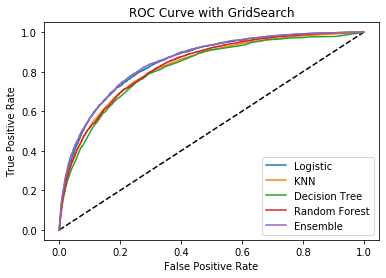

In [45]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log_g, tpr_log_g,label = 'Logistic')
plt.plot(fpr_knn_g, tpr_knn_g,label = 'KNN')
plt.plot(fpr_tree_g, tpr_tree_g,label = 'Decision Tree')
plt.plot(fpr_rfc_g, tpr_rfc_g,label = 'Random Forest')
plt.plot(fpr_ens, tpr_ens,label = 'Ensemble')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with GridSearch')
plt.show()

In [46]:
# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_log_g_prob)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_knn_g_prob)))
print("AUC Decision Tree: {}".format(roc_auc_score(y_test, y_tree_g_prob)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_rfc_g_prob)))
print("AUC Ensemble: {}".format(roc_auc_score(y_test, y_ens_prob)))

AUC Logistic: 0.8493217093299944
AUC KNN: 0.8265831329816611
AUC Decision Tree: 0.8169595589799167
AUC Random Forest: 0.8315664897750192
AUC Ensemble: 0.8531796745399629


In [49]:
print(confusion_matrix(y_test, ensemble_preds2))
print(classification_report(y_test, ensemble_preds2))

[[9347 2139]
 [1394 3555]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     11486
           1       0.62      0.72      0.67      4949

    accuracy                           0.79     16435
   macro avg       0.75      0.77      0.75     16435
weighted avg       0.80      0.79      0.79     16435



In [ ]:
abs(base-metrics.accuracy_score(y_test, ensemble_preds2))/base

In [50]:
import pickle

pickle_out = open("scaler.pickle","wb")
pickle.dump(scaler.fit(X_train), pickle_out)
pickle_out.close()

In [52]:
import pickle


pickle_out = open("pred.pickle","wb")
pickle.dump(ensemble_model2, pickle_out)
pickle_out.close()

# Feature Importance

In [ ]:
#LOGREG 
dictionary = vdict(vzip(list(predictors.columns), list(logreg_grid.coef_[0])))

In [ ]:
dictionary_logreg = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1])}

In [ ]:
#DECISION TREE
dictionary = dict(zip(list(predictors.columns), list(tree_grid.coef_[0])))
dictionary_tree = {k: v for k, v in sorted(dictionary_tree.items(), key=lambda item: item[1], reverse = True)}

In [ ]:
# get importance
importance = tree_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
importance = forest_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()